# Kronometer

Razlike v hitrosti ljubljanskih kolesarjev ne izhajajo toliko iz njihovih hitrosti po normalnem terenu kot iz njihove spretnosti. Konkretno, kolesar za vsako povezavo potrebuje `4` časovne enote + pribitek zaradi različnih ovir. Pribitki so različni za vsakega kolesarja. Opisani so v slovarju; če so pri nekem konkretnem kolesarju pribitki enake `{"črepinje": 2, "bolt": 4, "stopnice": 1, "pešci": 5}`, bo za povezavo, ki zahteva veščini *črepinje* in *pešci* potreboval 4 + 2 + 5 = 11 časovnih enot.

V vseh funkcijah uporabljaj (globalno) spremenljivko `zemljevid`. (Torej, v funkciji mirno uporabljaj `zemljevid`, kot da bi ga funkcija dobila kot argument.) Zemljevid bo vseboval povezave v obe smeri (ključa `(A, B)` in `(B, A)`). Pripadajoče vrednosti bodo množice veščin, kot smo navajeni.

Argument `pribitki` je vedno slovar, ki pove, koliko pribitka na čas povzroči posamezna veščina. Vsi kolesarji so veterani ljubljanskih kolesarskih poti in torej obvladajo vse potrebne veščine. Vse povezave na poti bodo vedno obstajale.

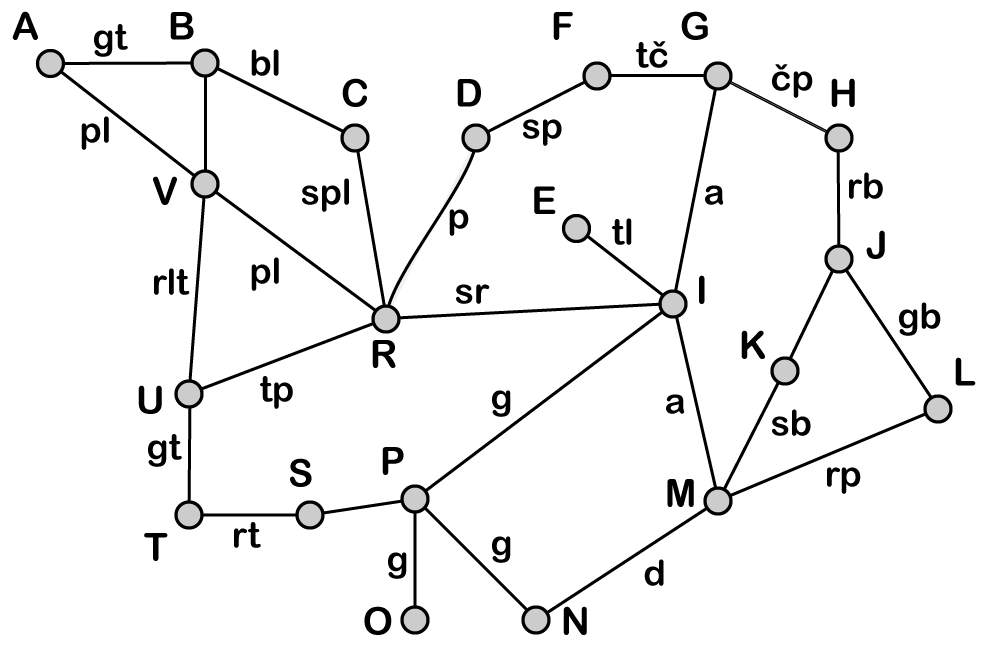

## Ocena 6

- `cas_za_povezavo(povezava, pribitki)` naj vrne čas, ki ga kolesar potrebuje za podano povezavo.
- `cas(pot, pribitki)` vrne čas, ki ga kolesar potrebuje za podano pot.
- `povezava_spotike(pribitki)` vrne tisto povezavo na zemljevidu (npr. terko `(R, I)`, ki kolesarju vzame največ časa. Če je takšnih več, vrne tisto, ki je zadnja po abecedi (in obrnjena tako, da je zadnja po abecedi, recimo `(M, I)` in ne `(I, M)`. (Glede tega se ne vznemirjaj preveč; zgodilo se bo samo od sebe.))

### Rešitev

#### `cas_za_povezavo`

Vrniti moramo 4 + vsoto pribitkov za vse veščine, ali, če prevedemo iz slovenščine v Python,

In [1]:
def cas_za_povezavo(povezava, pribitki):
    return 4 + sum(pribitki[vescina] for vescina in zemljevid[povezava])

Tisti, ki so mu generatorski izrazi magija, gre pač po starem in piše

In [2]:
def cas_za_povezavo(povezava, pribitki):
    cas = 4
    for vescina in zemljevid[povezava]:
        cas += pribitki[vescina]
    return cas

#### cas

Vrniti moramo čas za povezavo za vse povezave na poti. Na hitro tako

In [3]:
from itertools import pairwise

def cas(pot, pribitki):
    return sum(cas_za_povezavo(povezava, pribitki) for povezava in pairwise(pot))

Na počasi pa tako

In [4]:
def cas(pot, pribitki):
    skupni_cas = 0
    for povezava in pairwise(pot):
        skupni_cas += cas_za_povezavo(povezava, pribitki)
    return skupni_cas

Ob tem je potrebno omeniti tri stvari.

1. V funkciji `cas` kličemo funkcijo `cas_za_povezavo`. Kdor je ne, bo pač moral znotraj te, druge funkcije, ponoviti vse, kar je naredil že v prvi. Če bo enako ravnal v vseh naslednjih, bo vsaka funkcija dolga skoraj toliko, kot vse prejšnje skupaj. Učeno se temu reče eksponentna rast. :)

2. Uporabili smo funkcijo `pairwise`, ki jo prijazno ponuja modul `itertools`. Funkcija je stara dve leti (Python 3.10). Poprej bi namesto `pairwise(pot)` pisali `zip(pot, pot[1:])`.

3. Spremenljivko, v katero seštevamo čas, smo poimenovali `skupni_cas`. Lahko bi jo tudi `cas`, vendar je tako ime že funkciji, ki jo ravnokar pišemo, zato se temu - čeprav tule sicer ne bi povzročalo nobenih sitnosti - raje izognemo. V prejšnji funkciji smo mirno uporabili ime `cas`, pa tudi v naslednji ga bomo; kako orodje za preverjanje "lepote" programov (pylint) bi ob tem pogodrnjalo.

#### povezava_spotike

V potu svojega obraza napišemo takšno funkcijo.

In [5]:
def povezava_spotike(pribitki):
    naj_povezava = naj_cas = None
    for povezava in zemljevid:
        cas  = cas_za_povezavo(povezava, pribitki)
        if naj_povezava is None or cas > naj_cas or cas == naj_cas and povezava > naj_povezava:
            naj_povezava = povezava
            naj_cas = cas
    return naj_povezava

"Garanje" je pogoj: povezavo si zapomnimo kot povezavo spotike, če doslej ni bilo še nobene (`naj_povezava is None`) ali pa je čas za povezavo, ki jo trenutno opazujemo, večji od najdaljšega doslej (`cas > naj_cas`) ali pa je enak (tega dela pogoja ne smemo pozabiti!) in je ta povezava po abecedi za najhujšo doslej (`cas == naj_cas and povezava > naj_povezava`).

Za začetek dva komentarja, potem izboljšave.

1. `for povezava in zemljevid:` in ne `for povezava in zemljevid.keys():` ali celo `povezave = list(zemljevid)` in potem `for povezava in povezave:`. S kratkimi programi je manj dela pri pisanju, branju, popravljanju in vzdrževanju.

2. Pogoj deluje zato, ker `and` veže močneje kot `or`. Vseeno bi tule zaradi preglednosti veljalo postaviti oklepaje - da je vsakemu, ki bere, hitreje jasno, kako je sestavljen pogoj: `naj_povezava is None or cas > naj_cas or (cas == naj_cas and povezava > naj_povezava)`. Še lepše je pogoj razbiti v tri vrstice; na konec vrstic postavimo `\`, da Python ve, da se vrstica nadaljuje.

In [6]:
def povezava_spotike(pribitki):
    naj_povezava = naj_cas = None
    for povezava in zemljevid:
        cas  = cas_za_povezavo(povezava, pribitki)
        if naj_povezava is None \
                or cas > naj_cas \
                or cas == naj_cas and povezava > naj_povezava:
            naj_povezava = povezava
            naj_cas = cas
    return naj_povezava

Nalogo lahko rešimo tudi brez nepotrebnega švicanja, če znamo uporabiti `max` z `key` in če znamo napisati lambdo.

In [7]:
def povezava_spotike(pribitki):
    return max(zemljevid, key=lambda povezava: (cas_za_povezavo(povezava, pribitki), povezava))

Če funkciji `max` z argumentom `key` podamo funkcijo, elementov (torej ključev slovarja `zemljevid`) ne bo primerjala po njihovih vrednostih, temveč po vrednostih, ki jih zanje vrne podana funkcija. `max` torej ne bo vrnil največjega elementa temveč element, za katerega podana funkcija vrne največjo vrednost. Na prvi pogled bi potrebovali `key=lambda povezavа: cas_za_povezavo(povezava, pribitki)`, vendar bo to primerjalo le čase, ne pa tudi povezav po abecedi, če so časi enaki. Zato naša lambda vrača terko z dvema stvarema: časom in povezavo. Tako bo `max` funkcije z enakim časom primerjal še po drugem elementu terke, povezavi. Ker naloga zahteva, da vrnemo povezavo, ki je zadnja po abecedi, bo `max` izbral pravo.

Če si želimo poenostaviti lambdo, pa lahko `max`-u podamo povezave, ki so urejene padajoče po abecedi. `max` v primeru, da je največjih več elementov, vrne tistega, na katerega naleti prej.

In [8]:
def povezava_spotike(pribitki):
    return max(sorted(zemljevid, reverse=True), key=lambda povezava: cas_za_povezavo(povezava, pribitki))

Ta rešitev je sicer počasnejša, ker mora urejati zemljevid. Če ni velik, nam je za to vseeno. Po drugi strani pa program zaradi tega tudi ni nič krajši (nasprotno: celo podaljšal se je!), torej je bila prejšnja rešitev pravzaprav boljša.

## Ocena 7

- `urnik(pot, pribitki)` vrne slovar, katerega ključi so točke, ki jih kolesar obišče, pripadajoče vrednosti pa časi (od začetka poti), ko je kolesar *prvič* v tej točki.

- `skupinski_sport(pot, pribitkii)` za razliko od ostalih funkcij ne prejme slovarja pribitki temveč seznam takšnih slovarjev (seznam vsebuje vsaj en element). Gre namreč za to, da gre na pot cela skupina kolesarjev. Ker so uvidevni, se na vsakem križišču počakajo. Funkcija mora vrniti čas, ki ga bo skupina potrebovala za podano pot.

- `tekma(pot, pribitkii)` prav tako dobi seznam slovarjev, vrniti pa mora indeks kolesarja (od `0` do, vključno, `len(pribitkii) - 1`)), ki bo prvi končal pot. Če ima enak najhitejši čas več kolesarjev, mora funkcija vrniti `None`.

### Rešitev

#### `urnik`

V slovar postavimo začetno točko in čas do nje je `0`. Nato simuliramo korake: gremo po poti, za vsako povezavo prišetejemo čas in v slovar dodamo ciljno točko povezave in skupni čas do nje - vendar le, če te točke še ni v slovarju in je torej še ni obiskal.

In [9]:
def urnik(pot, pribitki):
    prvic = {pot[0]: 0}
    cas = 0
    for od, do in pairwise(pot):
        cas += cas_za_povezavo((od, do), pribitki)
        if do not in prvic:
            prvic[do] = cas
    return prvic

Program nam malo skrajša metoda `setdefault`, ki doda ključ in vrednost, če ga še ni, sicer pa ga pusti pri miru. Funkcija tudi vrne staro vrednost (če je ključ že obstajal) oziroma novo (če ga še ni bilo). Vendar nas rezultat ne zanima, zato se z njim ne ukvarjamo.

In [10]:
def urnik(pot, pribitki):
    prvic = {pot[0]: 0}
    cas = 0
    for od, do in pairwise(pot):
        cas += cas_za_povezavo((od, do), pribitki)
        prvic.setdefault(do, cas)
    return prvic

### `skupinski_sport`

Podobno kot prej moramo tudi zdaj simulirati vožnjo, le da ničesar ne beležimo v slovar. Čas povečamo za največji čas, ki ga potrebuje kateri od kolesarjev.

In [11]:
def skupinski_sport(pot, pribitkii):
    cas = 0
    for povezava in pairwise(pot):
        naj_cas = 0
        for pribitki in pribitkii:
            ta_cas = cas_za_povezavo(povezava, pribitki)
            if ta_cas > naj_cas:
                naj_cas = ta_cas
        cas += naj_cas
    return cas

Za take namene so si v novejših različicah Pythona izmislili mrožji operator (*walrus operator*). Mnenja o njem so deljena; tudi moje mnenje o njem je deljeno, zato ga na predavanjih ne kažem pogosto. Ampak tule bi ga lahko. :)

In [12]:
def skupinski_sport(pot, pribitkii):
    cas = 0
    for povezava in pairwise(pot):
        najcas = 0
        for pribitki in pribitkii:
            if (ta_cas := cas_za_povezavo(povezava, pribitki)) > naj_cas:
                naj_cas = ta_cas
        cas += naj_cas
    return cas

Tako ali tako pa se v tej funkciji bolj spodobi uporabi `max` in generatorski izraz.

In [13]:
def skupinski_sport(pot, pribitkii):
    cas = 0
    for povezava in pairwise(pot):
        cas += max(cas_za_povezavo(povezava, pribitki) for pribitki in pribitkii)
    return cas

Ali pa še tole stlačimo kar v `sum`.

In [14]:
def skupinski_sport(pot, pribitkii):
    return sum(max(cas_za_povezavo(povezava, pribitki) for pribitki in pribitkii)
               for povezava in pairwise(pot))

#### `tekma`

Čase dobimo s funkcijo `cas`, tu ni kaj. Glavna finta naloge je, kako vrniti `None`, če je enako dobrih več kolesarjev. Takole: `naj_cas` bode najboljši čas, `naj_i` pa indeks kolesarja, ki ga je dosegel. Če enak čas doseže še kdo drug, preprosto nastavimo `naj_i` na `None`. Če se kasneje prikaže kdo, ki ima še boljši čas - prav. Če ne, bomo na koncu pač vrnili `None`.

In [15]:
def tekma(pot, pribitkii):
    naj_cas = naj_i = None
    for i, pribitki in enumerate(pribitkii):
        ta_cas = cas(pot, pribitki)
        if naj_cas is None or ta_cas < naj_cas:
            naj_cas = ta_cas
            naj_i = i
        elif ta_cas == naj_cas:
            naj_i = None
    return naj_i

`elif` je potreben zato, ker bo tisto, kar je znotraj `if` (morda) nastavilo `naj_cas` na `ta_cas` in potem bo drugi pogoj, `ta_cas == naj_cas` že takoj resničen in nastavil `naj_i` na `None`.

Alternativa je, da sestavimo seznam časov, poiščemo največjega in preverimo, kolikokrat se pojavi. Če enkrat, vrnemo indeks, če večkrat, `None`.

In [16]:
def tekma(pot, pribitkii):
    casi = [cas(pot, pribitki) for pribitki in pribitkii]
    naj_cas = min(casi)
    if casi.count(naj_cas) == 1:
        return casi.index(naj_cas)
    else:
        return None

Ker funkcija, ki ne vrne ničesar, vrne `None`, bi šlo tudi

In [17]:
def tekma(pot, pribitkii):
    casi = [cas(pot, pribitki) for pribitki in pribitkii]
    naj_cas = min(casi)
    if casi.count(naj_cas) == 1:
        return casi.index(naj_cas)

Vendar se to ne šteje za lepo. Pravilo je, da mora funkcija, ki v kakem primeru nekaj vrne, nekaj vrniti v vsakem primeru. Z drugimi besedami, nočemo pisati funkcij, ki imajo v nekaterih scenarijih `return`, v nekaterih pa ga nimajo in za to (brez našega eksplicitnega `return`-a vrnejo `None`). V tej funkciji je stvar očitna, v daljših in bolj razvejanih pa bi kdo pomislil, da smo v nekaterih scenarijih preprosto pozabili na `return`. Zato je bolj prav, da eksplicitno povemo, da funkcija v tem in tem primeru vrne `None`.

Ta, ki so mu všeč ternarni operatorji (C-jevski `?:`) pa bo v Pythonu napisal

In [18]:
def tekma(pot, pribitkii):
    casi = [cas(pot, pribitki) for pribitki in pribitkii]
    naj_cas = min(casi)
    return casi.index(naj_cas) if casi.count(naj_cas) == 1 else None

## Ocena 8

- `trening(pot, pribitki)` vrne čas, ki ga kolesar potrebuje za podano pot - podobno kot funkcija `cas`. Razlika je v tem, da se kolesar trenira: vsakič, ko uporabi določeno veščino, se čas, ki ga bo zanjo potreboval prihodnjič, zmanjša za 5 %. Funkcija mora vrniti čas in poleg tega tudi dejansko spremeniti slovar `pribitki`: po klicu funkcije morajo biti vrednosti v njem ustrezno manjše.

- `zastavice(pot, pribitkii)` simulira igro, v kateri sodeluje poljubno število kolesarjev. Vsak kolesar ima svoje pribitke, zato funkcija prejme seznam slovarjev z pribitki. Na vsakem križišču je zastavica. Kolesar, ki prvi pride v križišče pobere zastavico (in ostali, ki pridejo v križišče, ne dobijo ničesar). Funkcija naj vrne seznam, ki ima toliko elementov, kolikor je tekmovalcev: i-ti element pove, koliko zastavic je pobral i-ti tekmovalec.

    Če prideta dva kolesarja v križišče istočasno, dobi zastavico tisti z manjšim indeksom. Tough luck.

    Kolesarji poberejo tudi zastavico v prvem križišču. Dobi jo pač ... tisti z najmanjšim indeksom.

### Rešitev

#### `trening`

Tole je malo kot funkcija `cas`, le da še spreminja vrednosti v slovarju.

In [19]:
def trening(pot, pribitki):
    cas = 0
    for povezava in pairwise(pot):
        for vescina in zemljevid[povezava]:
            cas += pribitki[vescina]
            pribitki[vescina] *= 0.95
        cas += 4
    return cas

Nekoč sem najbrž pridigal o tem, kako vsaka funkcija bodisi nekaj vrne bodisi nekaj naredi (na primer spremeni objekte, ki so ji podani kot argumenti), ne pa oboje. Razen kadar.

No, to je primer funkcije, kjer je to primerno.

#### `zastavice`

To se da obrniti na različne načine. Meni se zdi najbolj praktično iti prek vseh kolesarjev, za vsakega preveriti urnik in v nek slovar (`pobiralci`) za vsako točko beležiti, ob katerem času je videla najzgodnejšega pobiralca.

Nato sestavimo seznam, ki ga bomo vrnili; dolg je toliko, kolikor je kolesarjev in ima v začetku same ničle. Gremo čez slovar, v katerem je za vsako zastavico zapisano, kdo jo je pobral. Ker nas ne zanimajo zastavice (ključi), gremo le čez `values()`; vrednosti so pari in ker nas tudi časi ne zanimajo več, si zapomnimo le indekse, `for _, i in pobiralci.values()`.

In [20]:
def zastavice(pot, pribitkii):
    pobiralci = {}
    for i, pribitki in enumerate(pribitkii):
        for tocka, cas in urnik(pot, pribitki).items():
            if tocka not in pobiralci or cas < pobiralci[tocka][0]:
                pobiralci[tocka] = (cas, i)

    zastavic = [0] * len(pribitkii)
    for _, i in pobiralci.values():
        zastavic[i] += 1
    return zastavic

Alternativni - vzporedno voziti vse kolesarje po poti - se izkaže za daljši.

In [21]:
def zastavice(pot, pribitkii):
    casi = [0] * len(pribitkii)
    zastavic = [0] * len(pribitkii)
    pobrano = {pot[0]}
    zastavic[0] = 1
    for povezava in pairwise(pot):
        naj_i = 0
        for i, pribitki in enumerate(pribitkii):
            casi[i] += cas_za_povezavo(povezava, pribitki)
            if casi[i] < casi[naj_i]:
                naj_i = i
        if povezava[1] not in pobrano:
            pobrano.add(povezava[1])
            zastavic[naj_i] += 1
    return zastavic

V osnovi je daljši zato, ker smo prej lahko uporabili funkcijo `urnik`, zdaj pa vzdržujemo seznamo časov `casi` in jih povečujemo v okviru te funkcije. Namesto slovarja `pobiralci`, katerega ključi so točke, pa imamo tu imamo množico, ki beleži pobrane zastavice. Torej nismo kaj prida pridobili.

Če računamo na to, da funkcija `urnik` vedno dodaja točke v slovar v enakem vrstnem redu, lahko funkcijo napišemo tudi tako, da poberemo urnike vseh kolesarjev in jih zipnemo skupaj. Potem za vsako točko preverimo, kdo ima v njej najmanjši čas in mu damo zastavico.

In [22]:
def zastavice(pot, pribitkii):
    urniki = [urnik(pot, pribitki).values() for pribitki in pribitkii]
    zastavice = [0] * len(pribitkii)
    for casi in zip(*urniki):
        naj_cas = float("inf")
        for i, cas in enumerate(casi):
            if cas < naj_cas:
                naj_i = i
                naj_cas = cas
        zastavice[naj_i] += 1
    return zastavice

Tule je zanimiv `zip`. Podati mu moramo vse urnike, kot argumente, torej nekaj v slogu `zip(urniki[0], urniki[1], urniki[2])`. To bi šlo, če bi bili trije. Ker pa števila urnikov ne poznamo vnaprej, to ne gre. Pač pa lahko z `zip(*urniki)` povemo, naj elemente seznama `urniki` uporabi kot argumente za funkcijo `zip`.

V bistvu isto dela spodnja funkcija. Če je komu v zabavo brati take stvari, naj se kar poglobi. :)

In [23]:
def zastavice(pot, pribitkii):
    return list(map([min(range(len(pribitkii)), key=casi.__getitem__)
                     for casi in zip(*[urnik(pot, pribitki).values()
                                       for pribitki in pribitkii])].count, range(len(pribitkii))
                    ))


## Ocena 9

Lenuh vozi po Ljubljani tako, da se v vsakem koraku preprosto odloči za povezavo, ki mu bo vzela najmanj časa. Če je takšnih povezav več, gre v točko, ki je prej po abecedi. Edini pravili sta, da nikoli ne gre po povezavi, po kateri je ravnokar prišel in da nikoli ne gre v slepo ulico (torej v točko, ki ima samo eno povezavo, saj bi to pomenilo, da bi kršil prejšnje pravilo in se vračal po isti povezavi). Seveda se bo izkazalo, da se bo prej ko slej zaciklal. :)

Za potrebe te naloge smeš predpostaviti, da na zemljevidu ni slepih ulic (začasno sta odstranjeni točki E in O.)

- `cikel(zacetna_tocka, pribitki)` vrne dolžino cikla. Če se kolesar zacikla tako, da v nedogled ponavlja RDFGIRDFGIRDFGI, je dolžina cikla 5. (V dolžino cikla seveda niso vštete točke, ki jih je prevozil, preden se je zaciklal.)

Pazi: ko se kolesar prvič znajde v točki, v kateri je že bil, to še ne pomeni, da se je zaciklal.

### Rešitev

Ko pride kolesar tretjič na isto povezavo, se je gotovo zaciklal. Prvič in drugič je šel morda v različnih smereh, vtretje pa je konec. Zato bomo funkcijo napisali tako, da bo kolesar najprej naredil dvakrat toliko korakov, kolikor je povezav. Nato si bomo zapomnili, katero povezavo je pravkar prevozil. Potem nadaljujemo simulacijo in štejemo korake do takrat, ko ponovno prevozi to isto povezavo.

In [24]:
from itertools import count

def cikel(tocka, pribitki):
        def najugodnejsa(tocka, prejsnja):
            return min(((t, nasl) for (t, nasl), vescine in zemljevid.items()
                        if t == tocka and nasl != prejsnja),
                       key=lambda povezava: cas_za_povezavo(povezava, pribitki))[1]

    prejsnja = None
    for _ in range(2 * len(zemljevid)):  # dovolj bi bilo 3 * število točk (se mi zdi)
        tocka, prejsnja = najugodnejsa(tocka, prejsnja), tocka

    zacetek = (prejsnja, tocka)
    for korakov in count(1):
        tocka, prejsnja = najugodnejsa(tocka, prejsnja), tocka
        if (prejsnja, tocka) == zacetek:
            return korakov

V drugi zanki smo uporabili funkcijo `count`. Podobna je funkciji `range`, le da šteje od `0` oziroma od vrednosti, ki jo podamo kot argument, pa do neskončno.

Za računanje najugodnejše povezave smo si pripravili ločeno funkcijo `najugodnejsa`, saj jo potrebujemo na dveh mestih. V njej smo uporabili `min` in `lambdo` in generatorske izraze. Šlo bi seveda tudi brez - ampak zdaj smo pri oceni 9 in tole bi moral biti že najmanjši problem. Lahko pa bi jo seveda sprogramirali na daljši način - ta funkcija ni bistvo te naloge.

Šlo bi tudi z eno zanko: po `2 * len(zemljevid)` korakih si zapomnimo povezavo in ko nanjo naletimo naslednjič vrnemo število korakov, ki smo jih naredili po `2 * len(zemljevid)` korakih.

In [25]:
def cikel(tocka, pribitki):
    def najugodnejsa(tocka, prejsnja):
        return min(((t, nasl) for (t, nasl), vescine in zemljevid.items()
                    if t == tocka and nasl != prejsnja),
                   key=lambda povezava: cas_za_povezavo(povezava, pribitki))[1]

    prejsnja = None
    zacetek = None
    for korak in count(1):
        if korak == 2 * len(zemljevid):
            zacetek = (prejsnja, tocka)
        tocka, prejsnja = najugodnejsa(tocka, prejsnja), tocka
        if (prejsnja, tocka) == zacetek:
            return korak - 2 * len(zemljevid) + 1

Kakorkoli. Meni je bolj všeč prejšnja različica, iz katere je bolj jasno, kako teče program.

## Ocena 10

Tekmovanje, ki ga simulira zastavice, je tako zapleteno, da smo izgleda narobe razumeli navodila. Tekmovanje v resnici deluje na izpadanje. Na vsakem križišču je zastavica. Vsak kolesar ima svojo pot in svoje pribitke. Ko kolesar pride na križišče, vzame zastavico. (To velja tudi za križišče, v katerem začne pot.) Če zastavice na križišču ni več, pa izpade - ne nadaljuje poti, ne pobira novih zastavic. Če istočasno pride v križišče več kolesarjev, pobere zastavico kolesar z najmanjšim indeksom; ostali so izločeni

- `izpadanje(poti, pribitkii)` prejme seznam poti in seznam pribitkov. Vrniti mora seznam indeksov izpadlih kolesarjev, urejenih po vrstnem redu izpadanja. Če istočasno izpadeta dva kolesarja, mora biti manjši indeks zapisan pred večjim.

Kolesar, ki prevozi svojo predvideno pot, ne da bi izpadel, ni izpadel. Ostanejo lahko torej vsi kolesarji. Lahko pa se zgodi tudi, da vsi izpadejo.

### Rešitev

Pripravili si bomo seznam, v katerem bomo beležili vse kolesarje, ki so še aktivni. Seznam bo sestavljan iz trojk `(cas, indeks, korak)`. Trojka pove, da bo ob času `cas` kolesar z indeksom `indeks` končal svoj korak z zaporedno številko `korak`. Za vsakega kolesarja bomo imeli v vsakem koraku simulacije v seznamu en element, ki bo predstavljal to, kar kolesar počne trenutno.

Funkcija je takšna.

In [26]:
def izpadanje(poti, pribitkii):
    cas_ind_kor = [(0, i, 0) for i, pot in enumerate(poti)]
    pobrano = set()
    izpadli = []
    while cas_ind_kor:
        cas, ind, korak = min(cas_ind_kor)
        cas_ind_kor.remove((cas, ind, korak))
        pot = poti[ind]
        tocka = pot[korak]
        if tocka in pobrano:
            izpadli.append(ind)
        else:
            pobrano.add(tocka)
            korak += 1
            if korak < len(pot):
                cas_ind_kor.append((cas + cas_za_povezavo((tocka, pot[korak]), pribitkii[ind]), ind, korak))
    return izpadli

V začetku so vsi kolesarji ob času 0 na ničtem koraku. Množica pobranih zastavic, `pobrano` je prazna, izpadel ni nihče.

Nato pride zanka, ki teče, dokler imamo še kakega aktivnega kolesarja. V njej poberemo minimalni element - to je, trojko z najmanjšim prvim elementom, najmanjšim časom, skratka, trojko, ki ustreza kolesarju, ki bo prvi končal "potezo". Če ima enak čas več kolesarjev, bomo dobili tistega z nižjim indeksom. To trojko odstranimo iz seznama.

Nato si v `pot` preberemo pot, ki jo opravlja trenutni kolesar in v `tocka` njegovo pravkar doseženo točko. Če je ta točka med tistimi, ki nimajo več zastavice, je izpadel. Sicer pa dodamo zastavico med pobrane. Povečamo število korakov tega kolesarja in če njegova pot s tem ni končana, ga vrnemo v množico aktivnih kolesarjev, vendar s povečanim časom in korakom.

To je to.

Pri Algoritmih in podatkovnih strukturah boste izvedeli, da je za takšen seznam kolesarjev primernejša podatkovna struktura z imenom *kopica* (*heap*). Njeni osnovni operaciji sta `push` (dodajanje novega elementa) in `pop` ("iskanje" in odstranjevanje najmanjšega). *Iskanje* smo dali pod narekovaje, ker je kopica tako imenitna podatkovna struktura, da je najmanjši element vedno na začetku; ko ga odstranimo, pa ga zna hitro zamenjati z drugim najmanjšim, pa tudi dodajanje na ustrezno mesto je hitro.

Rešitev z uporabo kopice je praktično enaka gornji, le da v začetku spremenimo seznam v kopico (`heapify`), vrstici, v kateri poiščemo in pobrišemo najmanjši element zamenjamo s `heappop`, dodajanje pa s `heappush`.

In [27]:
from heapq import heappop, heappush, heapify

def izpadanje(poti, pribitkii):
    cas_ind_kor = [(0, i, 0) for i, pot in enumerate(poti)]
    heapify(cas_ind_kor)
    pobrano = set()
    izpadli = []
    while cas_ind_kor:
        cas, ind, korak = heappop(cas_ind_kor)
        pot = poti[ind]
        tocka = pot[korak]
        if tocka in pobrano:
            izpadli.append(ind)
        else:
            pobrano.add(tocka)
            korak += 1
            if korak < len(pot):
                heappush(cas_ind_kor, (cas + cas_za_povezavo((tocka, pot[korak]), pribitkii[ind]), ind, korak))
    return izpadli